In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor
from google.colab import files
import joblib
from scipy import stats
from scipy.stats import norm

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
#import the data set
train=pd.read_csv("gdrive/My Drive/Colab Notebooks/New folder/train.csv")
test=pd.read_csv("gdrive/My Drive/Colab Notebooks/New folder/test.csv")

In [4]:
# Display basic information
train.info()
test.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1459.000000,1459.000000,1232.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1444.000000,1458.000000,...,1458.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,2190.000000,57.378341,68.580357,9819.161069,6.078821,5.553804,1971.357779,1983.662783,100.709141,439.203704,...,472.768861,93.174777,48.313914,24.243317,1.794380,17.064428,1.744345,58.167923,6.104181,2007.769705
std,421.321334,42.746880,22.376841,4955.517327,1.436812,1.113740,30.390071,21.130467,177.625900,455.268042,...,217.048611,127.744882,68.883364,67.227765,20.207842,56.609763,30.491646,630.806978,2.722432,1.301740
min,1461.000000,20.000000,21.000000,1470.000000,1.000000,1.000000,1879.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,1825.500000,20.000000,58.000000,7391.000000,5.000000,5.000000,1953.000000,1963.000000,0.000000,0.000000,...,318.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,2190.000000,50.000000,67.000000,9399.000000,6.000000,5.000000,1973.000000,1992.000000,0.000000,350.500000,...,480.000000,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,2554.500000,70.000000,80.000000,11517.500000,7.000000,6.000000,2001.000000,2004.000000,164.000000,753.500000,...,576.000000,168.000000,72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,2919.000000,190.000000,200.000000,56600.000000,10.000000,9.000000,2010.000000,2010.000000,1290.000000,4010.000000,...,1488.000000,1424.000000,742.000000,1012.000000,360.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


In [5]:

# Display basic information
print("Train Shape: ",train.shape)
print("Test Shape: ",test.shape)

Train Shape:  (1460, 81)
Test Shape:  (1459, 80)


# **Explotary Data Analysis**

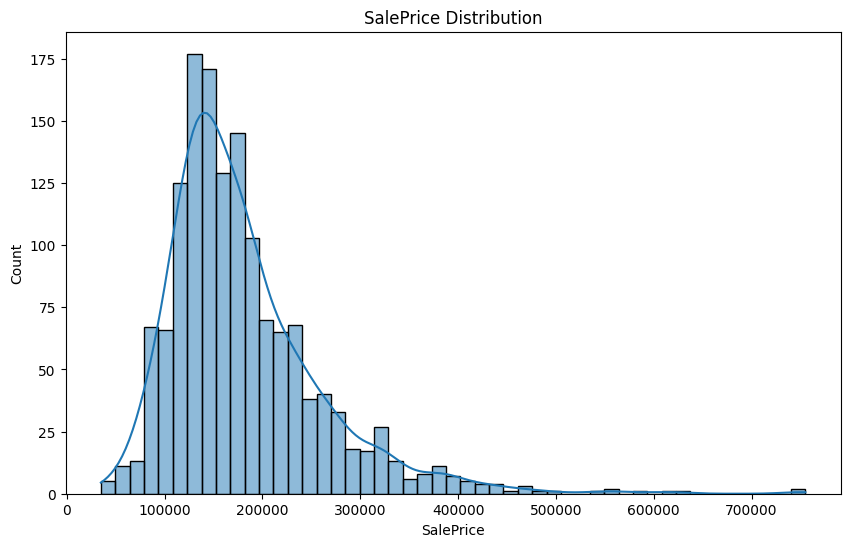

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [6]:
#Target Variable Analysis (SalePrice)
plt.figure(figsize=(10, 6))
sns.histplot(train['SalePrice'], kde=True)
plt.title('SalePrice Distribution')
plt.savefig('Target_Variable_Analysis.png')
plt.show()
files.download('Target_Variable_Analysis.png')

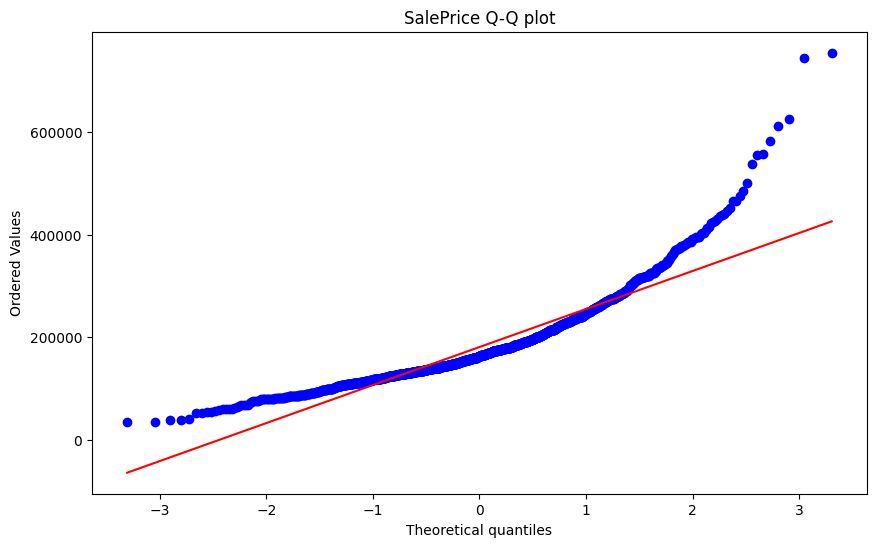

In [7]:
# Check for normality
plt.figure(figsize=(10, 6))
stats.probplot(train['SalePrice'], plot=plt)
plt.title('SalePrice Q-Q plot')
plt.savefig('normality.png')
plt.show()
# files.download('normality.png')

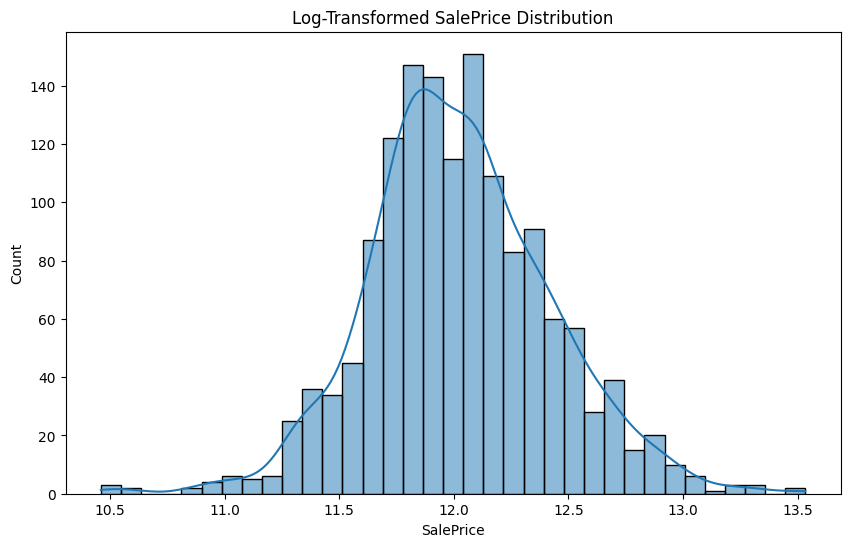

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [8]:
# Log transform the target for better normality
plt.figure(figsize=(10, 6))
sns.histplot(np.log1p(train['SalePrice']), kde=True)
plt.title('Log-Transformed SalePrice Distribution')
plt.savefig('Log_transform.png')
plt.show()
# files.download('Log_transform.png')

**Correlation Analysis**

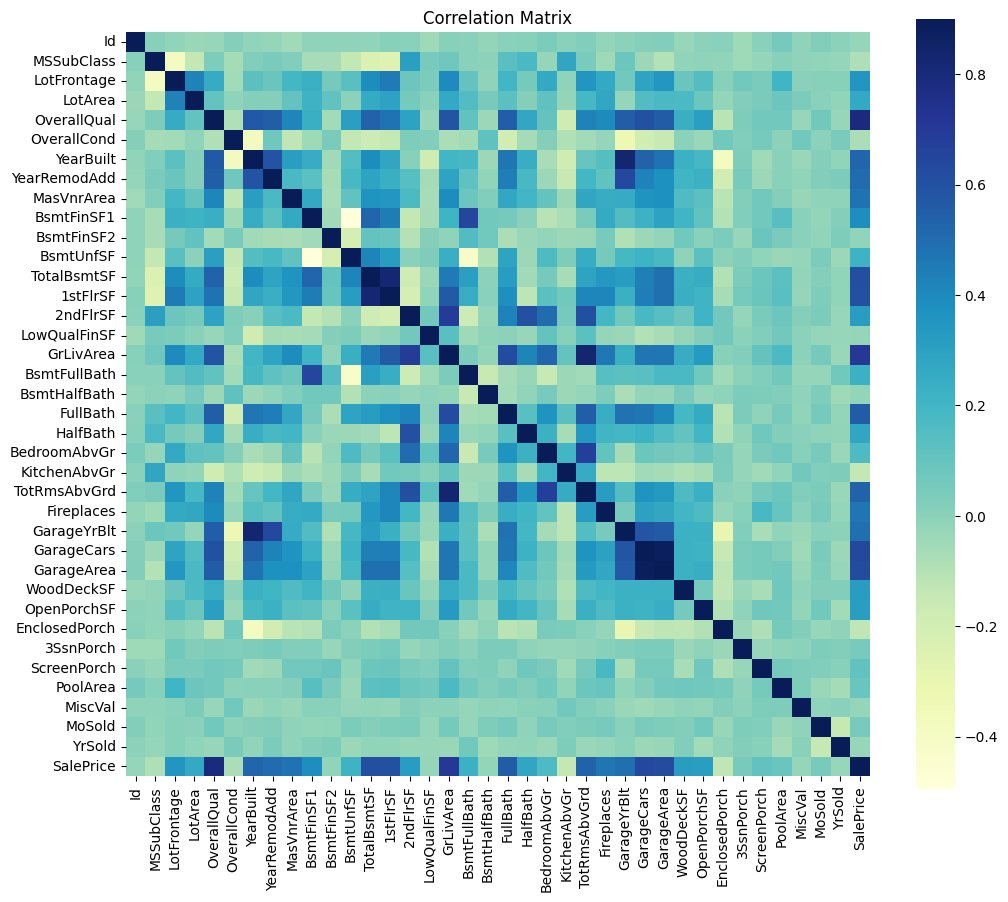

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [9]:
# Correlation matrix
plt.figure(figsize=(12, 10))
corr_matrix = train.select_dtypes(include=[np.number]).corr()
sns.heatmap(corr_matrix, vmax=0.9, square=True, cmap="YlGnBu")
plt.title('Correlation Matrix')
plt.savefig('Correlation_Matrix.png')
plt.show()
# files.download('Correlation_Matrix.png')

In [10]:
top_corr = corr_matrix['SalePrice'].sort_values(ascending=False)[:11]
print("Top correlated features with SalePrice:")
print(top_corr)

Top correlated features with SalePrice:
SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
Name: SalePrice, dtype: float64


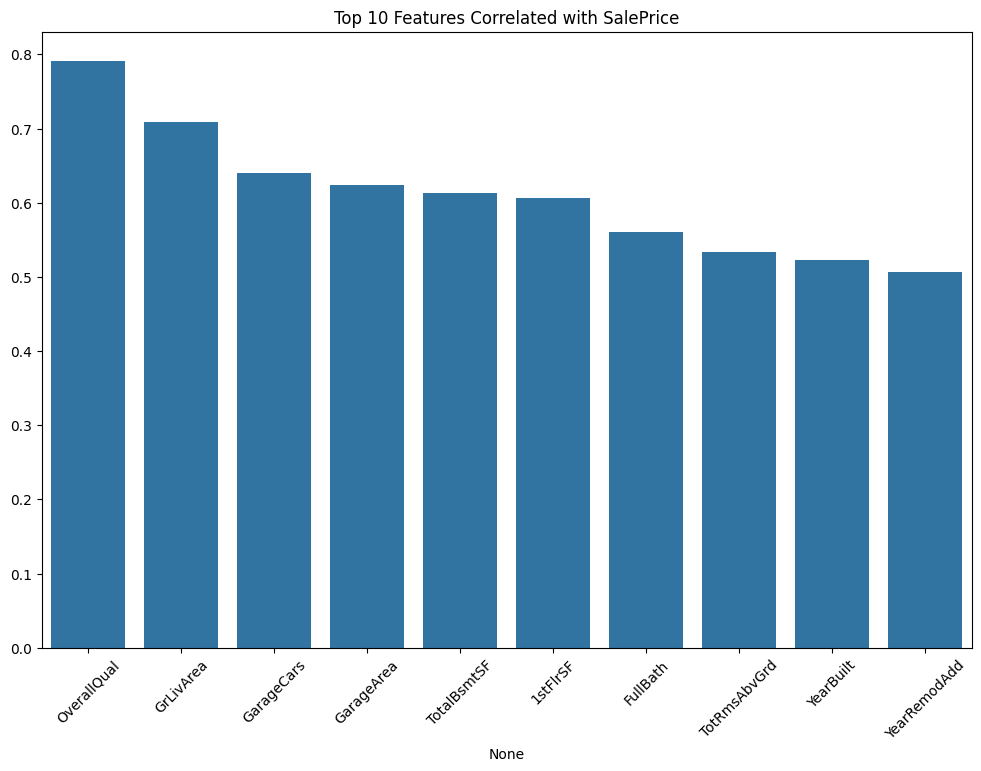

In [11]:
# Visualize these correlations
plt.figure(figsize=(12, 8))
sns.barplot(x=top_corr.index[1:], y=top_corr.values[1:])
plt.title('Top 10 Features Correlated with SalePrice')
plt.xticks(rotation=45)
plt.savefig('Visualize_correlations.png')
plt.show()
# files.download('Visualize_correlations.png')

**Feature Relationships with SalePrice**

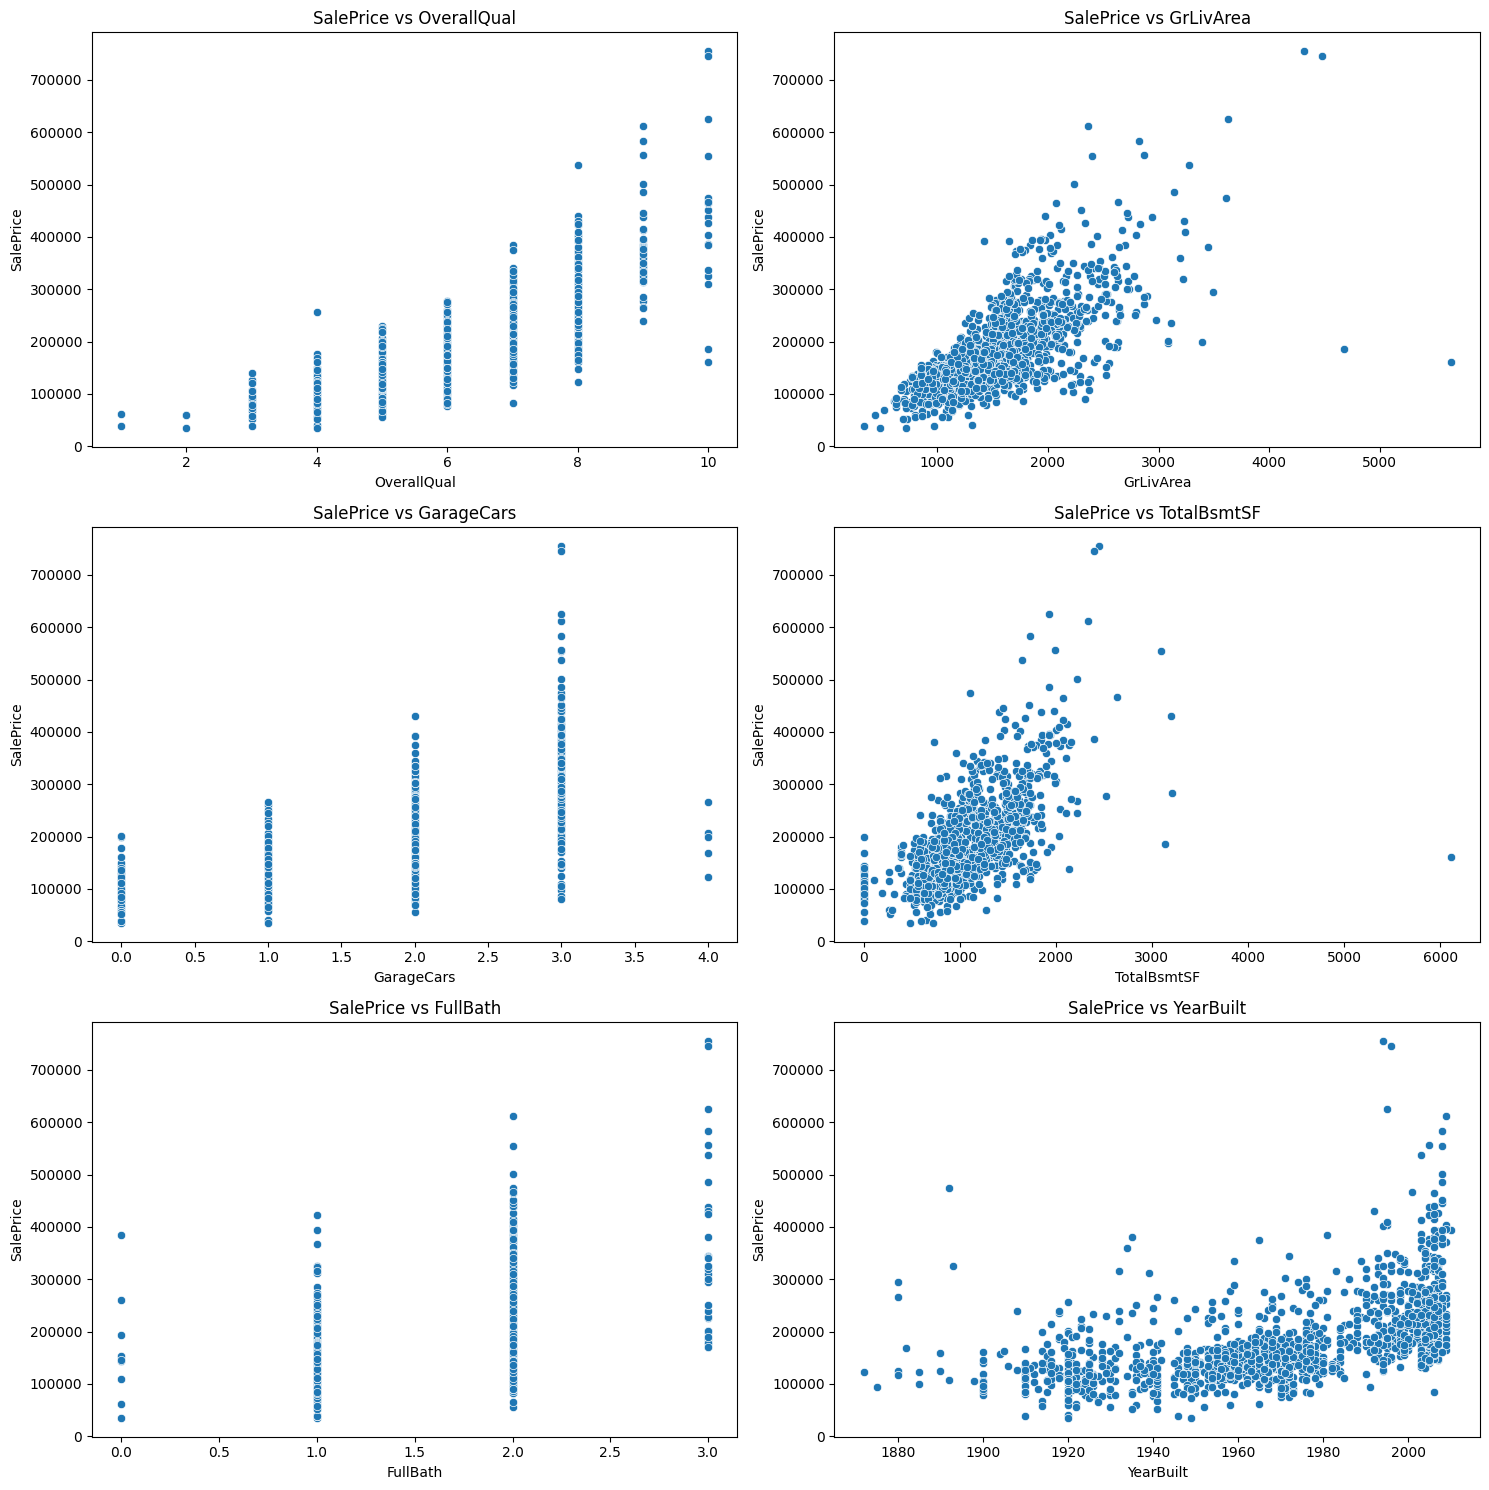

In [12]:
#Numerical features
num_features = ['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']

fig, axes = plt.subplots(3, 2, figsize=(15, 15))
axes = axes.flatten()

for i, feature in enumerate(num_features):
    sns.scatterplot(x=train[feature], y=train['SalePrice'], ax=axes[i])
    axes[i].set_title(f'SalePrice vs {feature}')

plt.tight_layout()
plt.savefig('num_features.png')
plt.show()
# files.download('num_features.png')

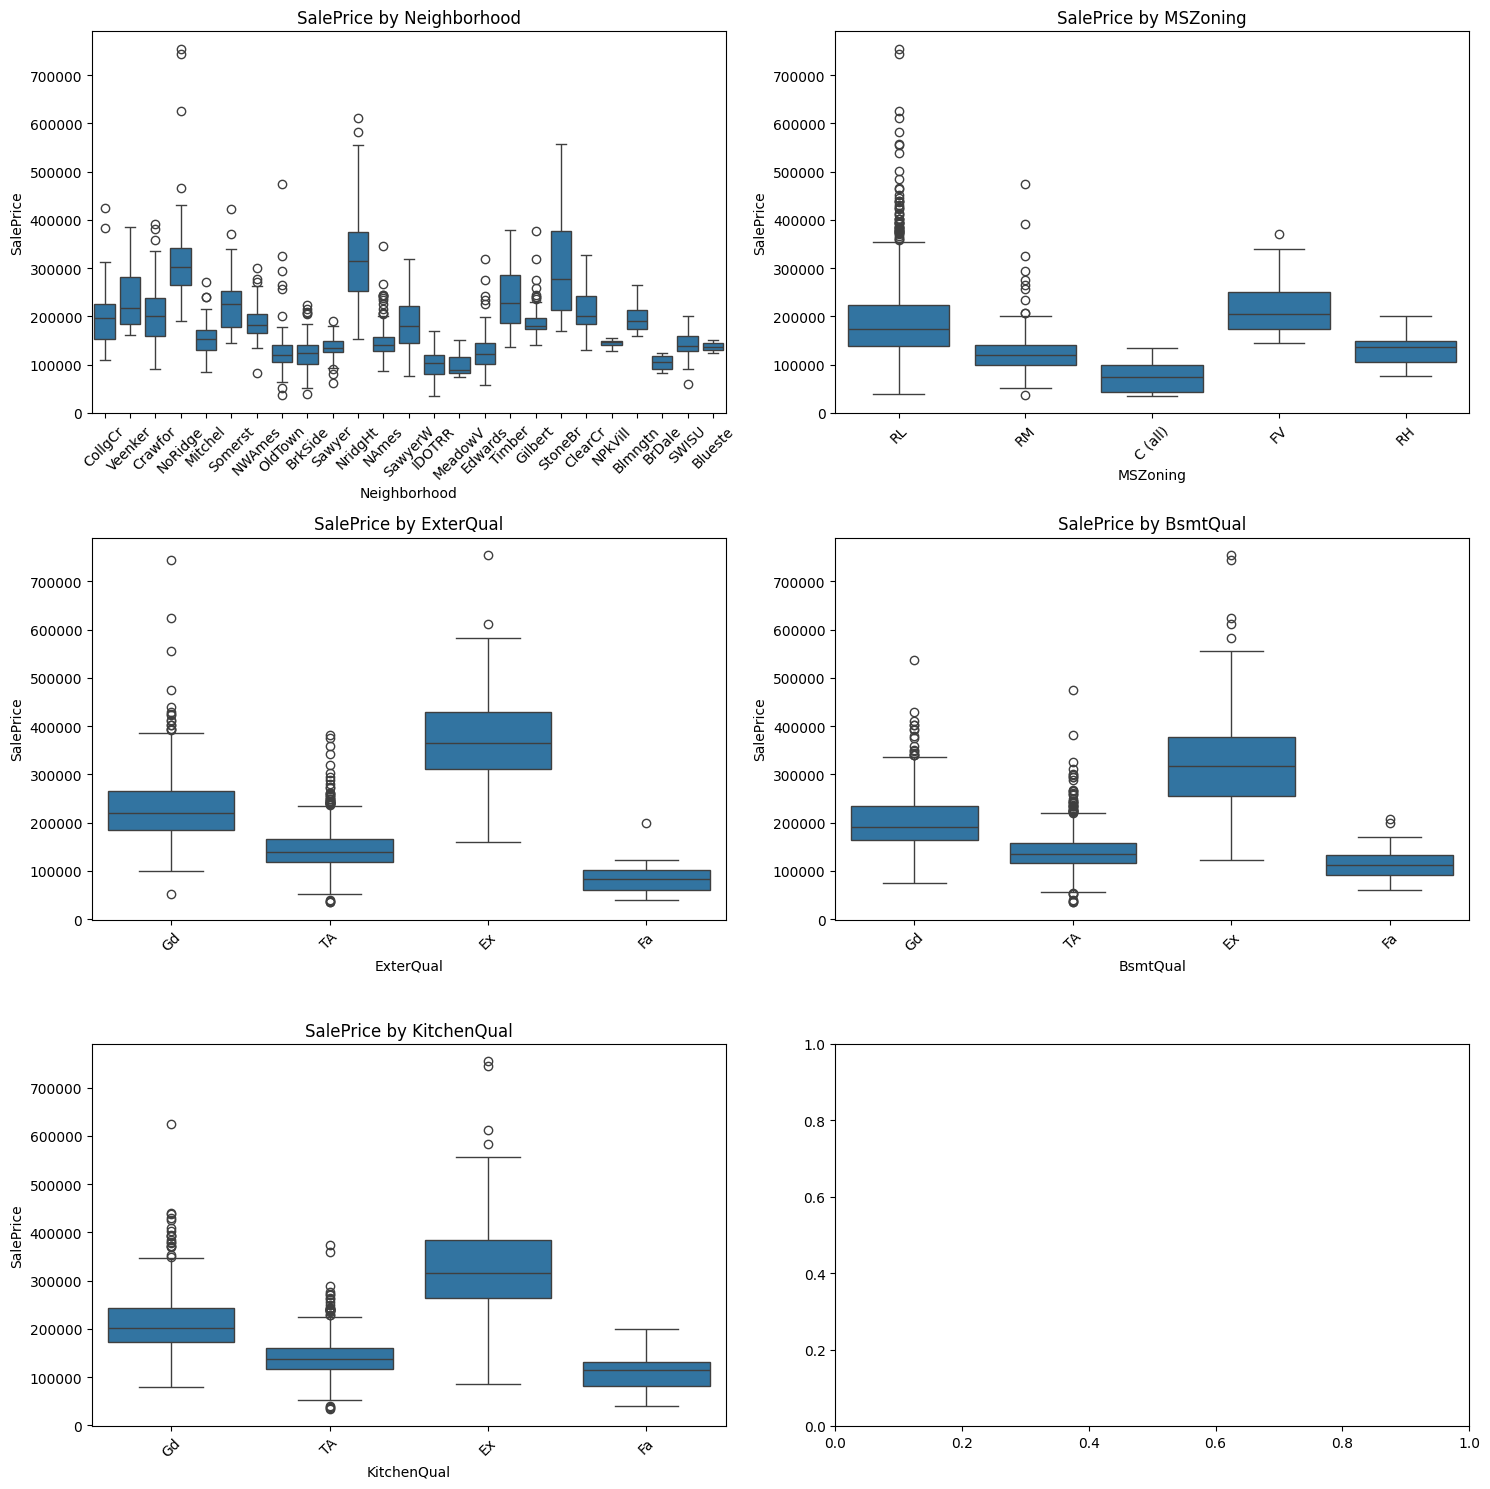

In [13]:
# Categorical features
cat_features = ['Neighborhood', 'MSZoning', 'ExterQual', 'BsmtQual', 'KitchenQual']

fig, axes = plt.subplots(3, 2, figsize=(15, 15))
axes = axes.flatten()

for i, feature in enumerate(cat_features):
    if i < len(axes):
        sns.boxplot(x=train[feature], y=train['SalePrice'], ax=axes[i])
        axes[i].set_title(f'SalePrice by {feature}')
        axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.savefig('cat_features.png')
plt.show()
# files.download('cat_features.png')

# Handle Missing Values

In [14]:
# Function to calculate missing values percentage
def missing_percentage(df):
    total = df.isnull().sum().sort_values(ascending=False)
    percent = (df.isnull().sum() / df.isnull().count()).sort_values(ascending=False)
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    return missing_data[missing_data['Total'] > 0]

In [15]:
# Missing values percentage in training set
missing_train = missing_percentage(train)
missing_train

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
MasVnrType,872,0.597260
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageYrBlt,81,0.055479
GarageCond,81,0.055479
GarageType,81,0.055479


In [16]:
# Drop columns with >50% missing values in both datasets
cols_to_drop = ['Id','PoolQC', 'MiscFeature', 'Alley', 'Fence','MasVnrType']
df_train = train.drop(cols_to_drop, axis=1)
df_test = test.drop(cols_to_drop, axis=1)

In [17]:
print("Train Shape: ",df_train.shape)
print("Test Shape: ",df_test.shape)

Train Shape:  (1460, 75)
Test Shape:  (1459, 74)


In [18]:
# Handling missing values
for column in df_train.select_dtypes(include=['float64', 'int64']).columns:
    df_train[column] = df_train[column].fillna(df_train[column].mean())

# Impute missing values for categorical features with the mode
for column in df_train.select_dtypes(include=['object']).columns:
    df_train[column] = df_train[column].fillna(df_train[column].mode()[0])

#test data
for column in df_test.select_dtypes(include=['float64', 'int64']).columns:
    df_test[column] = df_test[column].fillna(df_test[column].mean())

# Impute missing values for categorical features with the mode
for column in df_test.select_dtypes(include=['object']).columns:
    df_test[column] = df_test[column].fillna(df_test[column].mode()[0])

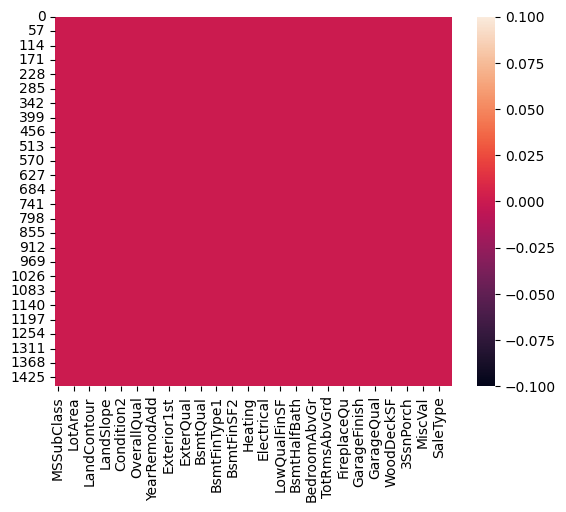

In [19]:
df_train.isnull().sum()[df_train.isnull().sum() > 0]
sns.heatmap(df_train.isnull())
plt.savefig('null_values.png')
plt.show()
# files.download('null_values.png')

# **Feature Engineering**

In [20]:
for df in [df_train, df_test]:
    df['TotalSF'] = df['TotalBsmtSF'] + df['1stFlrSF'] + df['2ndFlrSF']
    df['TotalBath'] = df['FullBath'] + 0.5*df['HalfBath']
    df['HouseAge'] = df['YrSold'] - df['YearBuilt']
    df['Remodeled'] = np.where(df['YearRemodAdd'] != df['YearBuilt'], 1, 0)
    df['Qual*SF'] = df['OverallQual'] * df['GrLivArea']

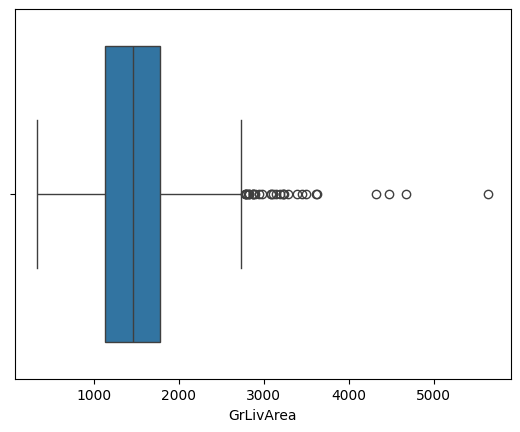

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

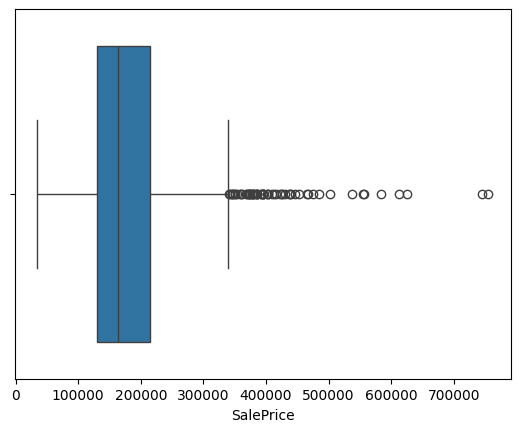

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

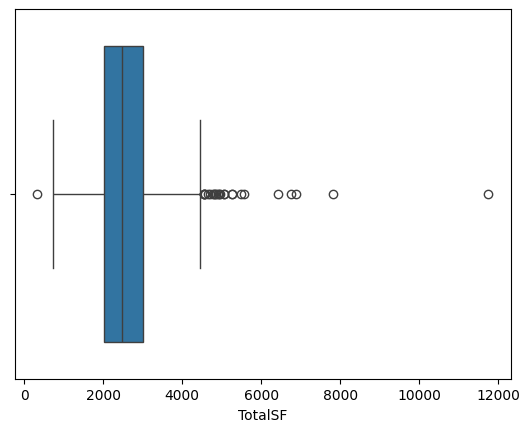

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [21]:
# Check for outliers using boxplots
features = ['GrLivArea', 'SalePrice','TotalSF']
for feature in features:
    sns.boxplot(x=df_train[feature])
    plt.savefig('features.png')
    plt.show()
    # files.download('features.png')

In [22]:
# Highlight outliers
outliers = df_train[(df_train['GrLivArea'] > 4000) | (df_train['TotalSF'] > 6000) | (df_train['SalePrice'] > 600000)]
outliers

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,MoSold,YrSold,SaleType,SaleCondition,SalePrice,TotalSF,TotalBath,HouseAge,Remodeled,Qual*SF
496,20,RL,70.049958,12692,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,5,2007,WD,Normal,430000,6428,3.0,15,1,25824
523,60,RL,130.000000,40094,Pave,IR1,Bnk,AllPub,Inside,Gtl,...,10,2007,New,Partial,184750,7814,3.5,0,1,46760
691,60,RL,104.000000,21535,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,1,2007,WD,Normal,755000,6760,3.5,13,1,43160
898,20,RL,100.000000,12919,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,3,2010,New,Partial,611657,4694,2.5,1,1,21276
1169,60,RL,118.000000,35760,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,...,7,2006,WD,Normal,625000,5557,3.5,11,1,36270
1182,60,RL,160.000000,15623,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,7,2007,WD,Abnorml,745000,6872,3.5,11,0,44760
1298,60,RL,313.000000,63887,Pave,IR3,Bnk,AllPub,Corner,Gtl,...,1,2008,New,Partial,160000,11752,2.5,0,0,56420


In [23]:
# Remove outliers
df_train = df_train[df_train['GrLivArea'] < 4000]
df_train = df_train[df_train['TotalSF'] < 6000]
df_train = df_train[df_train['SalePrice'] < 600000]

In [24]:
df_train.shape

(1453, 80)

In [25]:
# Separate features and target
X = df_train.drop(['SalePrice'], axis=1)
y = np.log1p(df_train['SalePrice'])# Log-transformed target

In [26]:
# Define preprocessing steps
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = X.select_dtypes(include=['object']).columns.tolist()

In [27]:
#Preprocessing pipeline
num_pipeline = Pipeline([
    ('scaler', StandardScaler())
])

cat_pipeline = Pipeline([
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer([
    ('num', num_pipeline, numerical_features),
    ('cat', cat_pipeline, categorical_features)
])

In [28]:
df_train.shape

(1453, 80)

# **Training and Comparing Models**

In [29]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Support Vector Machine': SVR(),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=500, learning_rate=0.05, max_depth=3, random_state=42),
    'XGBoost': XGBRegressor(n_estimators=500, learning_rate=0.05, max_depth=6, random_state=42),
}

results = {}

for name, model in models.items():
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('regressor', model)
    ])

    pipeline.fit(x_train, y_train)
    y_pred = pipeline.predict(x_test)

    results[name] = {
        "MAE": mean_absolute_error(y_test, y_pred),
        "RMSE": np.sqrt(mean_squared_error(y_test, y_pred)),
        "R2 Score": r2_score(y_test, y_pred),
    }

In [30]:
# Print model performance
for model, metrics in results.items():
    print(f"{model}:\n MAE: {metrics['MAE']}\n RMSE: {metrics['RMSE']}\n R2 Score: {metrics['R2 Score']}\n")

Linear Regression:
 MAE: 0.07609709351738281
 RMSE: 0.1099810407944007
 R2 Score: 0.9226411688492131

Decision Tree:
 MAE: 0.135803587145993
 RMSE: 0.19691694989862432
 R2 Score: 0.7520064136769795

Random Forest:
 MAE: 0.08620809537738193
 RMSE: 0.1294043265090881
 R2 Score: 0.892904347246599

Support Vector Machine:
 MAE: 0.09109753566005378
 RMSE: 0.13921378124648626
 R2 Score: 0.8760522327285041

Gradient Boosting:
 MAE: 0.08214522351774214
 RMSE: 0.12128604506496808
 R2 Score: 0.9059203012750819

XGBoost:
 MAE: 0.08610002422490395
 RMSE: 0.13044639636827002
 R2 Score: 0.8911725581040296



# **Best Model**

In [31]:
# Train final model on full training data
X_full = df_train.drop('SalePrice', axis=1)
y_full = np.log1p(df_train['SalePrice'])

final_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', GradientBoostingRegressor(n_estimators=500, learning_rate=0.05, max_depth=3, random_state=42))
])

final_pipeline.fit(X_full, y_full)

# Predict on test data
log_preds = final_pipeline.predict(df_test)
final_preds = np.expm1(log_preds)  # Reverse log transformation
final_preds
# # Create submission file
submission = pd.DataFrame({'Id': test['Id'], 'SalePrice': final_preds})
submission.to_csv('submission.csv', index=False)
# files.download('submission.csv')

In [32]:
# Identify numerical and categorical columns
numerical_features = X_full.select_dtypes(include=[np.number]).columns
categorical_features = X_full.select_dtypes(exclude=[np.number]).columns

# Compute means and modes
numerical_means = X_full[numerical_features].mean()
categorical_modes = X_full[categorical_features].mode().iloc[0]

# Save the final model
joblib.dump({
    "model": final_pipeline,
    "numerical_means": numerical_means,
    "categorical_modes": categorical_modes,
    "numerical_features": numerical_features.tolist(),
    "categorical_features": categorical_features.tolist()
}, 'house_price_model.pkl')

# files.download('house_price_model.pkl')

['house_price_model.pkl']